# Pie chart of samples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [8]:
df = pd.read_csv("../../input/phenotypes/merged/_m/merged_phenotypes.csv", index_col=0)
df = df[df["Race"].isin(["AA", "CAUC"]) & (df["Dx"].isin(["Control", "Schizo"]))].copy()
df.Race = df.Race.astype("category").cat.rename_categories({'CAUC': 'EA'})
df.head()

,BrNum,RNum,Region,RIN,Age,Sex,Race,Dx,mitoRate,rRNA_rate,overallMapRate
R12872,Br949,R12872,Caudate,9.2,18.05,M,AA,Control,0.021362,0.000029,0.909745
R12873,Br991,R12873,Caudate,9.4,35.24,M,AA,Control,0.022589,0.000028,0.899161
R12874,Br909,R12874,Caudate,7.4,57.83,F,AA,Control,0.056099,0.000174,0.640800
R12890,Br1157,R12890,Caudate,9.4,60.70,M,AA,Control,0.014670,0.000033,0.920617
R12891,Br1167,R12891,Caudate,9.6,45.86,M,AA,Control,0.032250,0.000098,0.883548


In [9]:
df.groupby("Region").size()

Region
Caudate         266
DLPFC           286
DentateGyrus     90
HIPPO           314
dtype: int64

In [10]:
data = df.groupby(["Region", "Race"]).size().reset_index().rename(columns={0:"N"})
data

,Region,Race,N
0,Caudate,AA,134
1,Caudate,EA,132
2,DLPFC,AA,164
3,DLPFC,EA,122
4,DentateGyrus,AA,47
5,DentateGyrus,EA,43
6,HIPPO,AA,174
7,HIPPO,EA,140


In [11]:
caudate = data[(data["Region"] == "Caudate")].drop("Region", axis=1).set_index("Race")
dlpfc = data[(data["Region"] == "DLPFC")].drop("Region", axis=1).set_index("Race")
gyrus = data[(data["Region"] == "DentateGyrus")].drop("Region", axis=1).set_index("Race")
hippocampus = data[(data["Region"] == "HIPPO")].drop("Region", axis=1).set_index("Race")

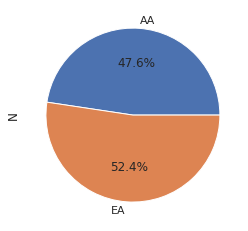

In [55]:
caudate.N.plot.pie(autopct="%.1f%%")
plt.savefig('caudate_pie.pdf')

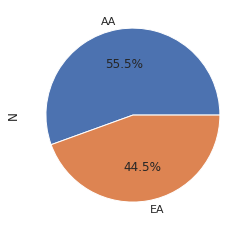

In [40]:
dlpfc.N.plot.pie(autopct="%.1f%%");
plt.savefig('dlpfc_pie.pdf')

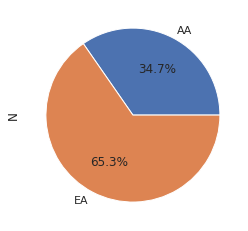

In [35]:
gyrus.N.plot.pie(autopct="%.1f%%");
plt.savefig('dentate_gyrus_pie.pdf')

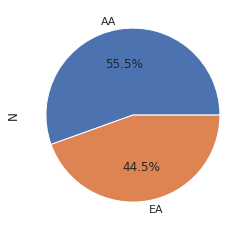

In [36]:
hippocampus.N.plot.pie(autopct="%.1f%%")
plt.savefig('hippocampus_pie.pdf')